In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colname = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]
df = pd.read_csv(path, header=None, names=colname)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


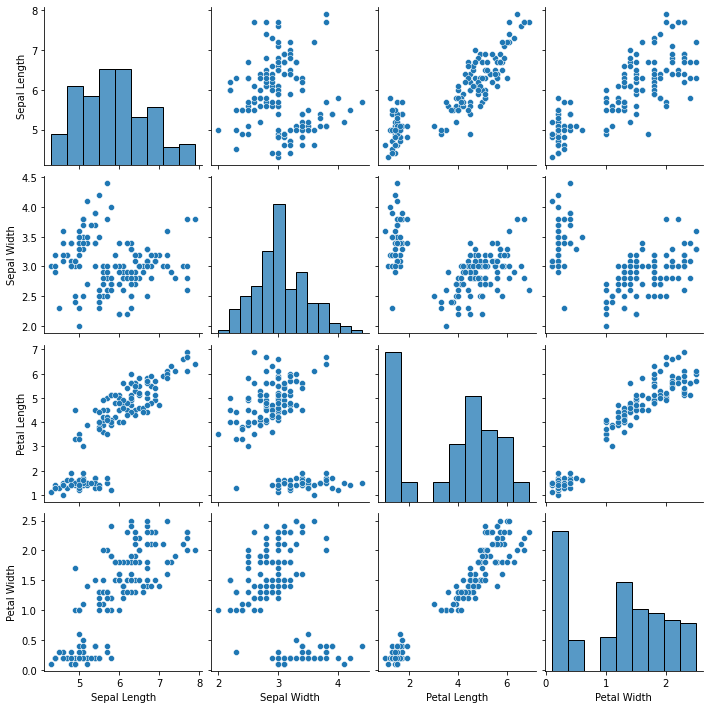

In [5]:
sns.pairplot(df)

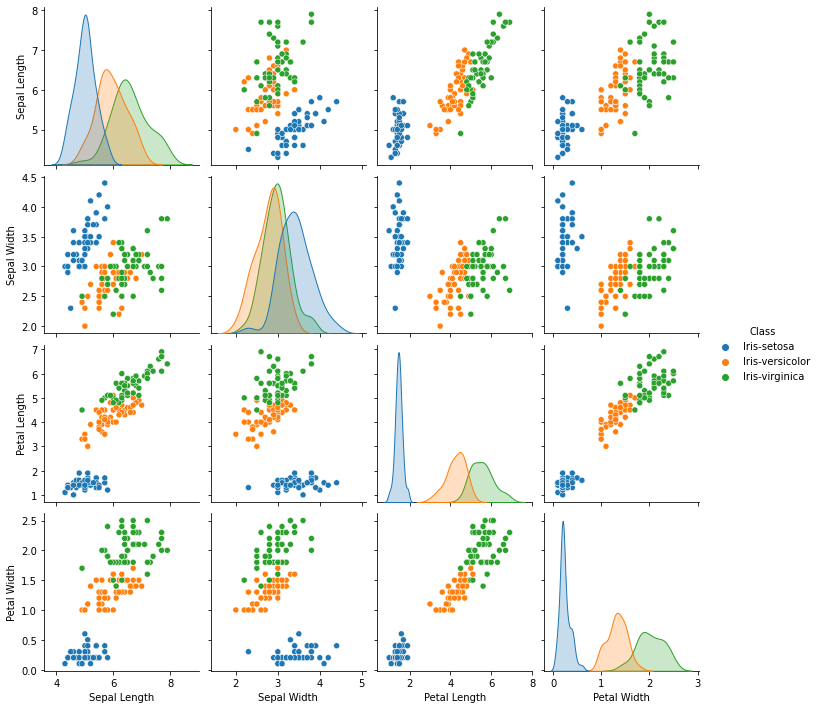

In [6]:
sns.pairplot(data=df, hue="Class")

In [7]:
df.Class

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [8]:
df.groupby("Class").size()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, 
                                                random_state=1)

In [11]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [13]:
train = svm.score(xtrain, ytrain)
test = svm.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.9619047619047619
Testing Accuracy : 0.9777777777777777


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [15]:
pipe= Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("svm", SVC())
    ]
)

In [16]:
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [18]:
train = svm.score(xtrain, ytrain)
test = svm.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.9619047619047619
Testing Accuracy : 0.9777777777777777


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
parameter = {
    "C":[0.1, 1, 10],
    "gamma":[0.1, 0.01, 0.001],
    "kernel":["rbf"]
}

In [21]:
grid = GridSearchCV(SVC(), parameter, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [22]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [23]:
grid.best_score_

0.9714285714285715

In [24]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [25]:
svm = grid.best_estimator_
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [27]:
train = svm.score(xtrain, ytrain)
test = svm.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.9809523809523809
Testing Accuracy : 1.0
